In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

s1s2_path = './s1s2_score.csv'

# columns=['idx','scan_enp', 'bev_enp', 'pf_scalar', 'pf_vector','s1_gt']
df = pd.read_csv(s1s2_path)

# df = df[df['pf_scalar']<10]

X = np.array([df['scan_enp'], df['bev_enp']]).T
y = np.array(df['s1_gt'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mae, r2

<AxesSubplot:xlabel='bev_enp', ylabel='s1_gt'>

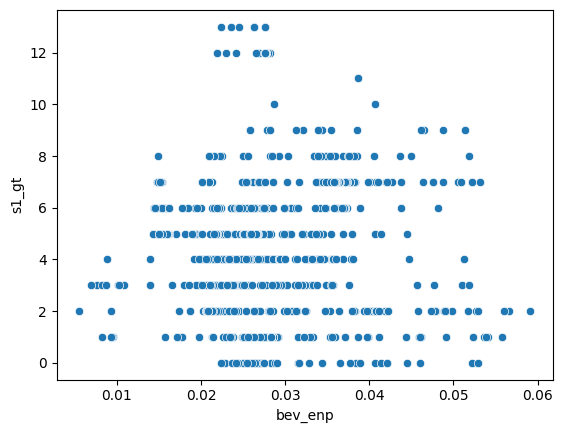

In [22]:
import seaborn as sns

sns.scatterplot(x=df['bev_enp'], y=df['s1_gt'])

[GBR x and y] test on train dataset
mse:  1.6435185474389444
rmse:  1.281997873414361
mae:  0.8409919083410452
r2:  0.7607751927725104
[GBR x and y] test on test dataset
mse:  3.533608664380661
rmse:  1.8797895266174511
mae:  1.3406904134242228
r2:  0.4884694950713916


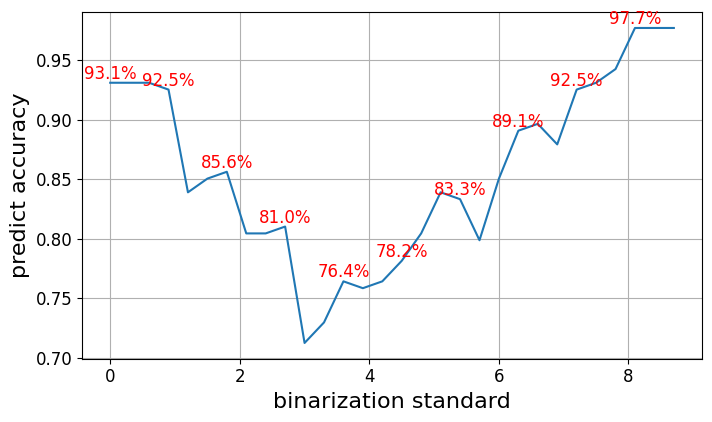

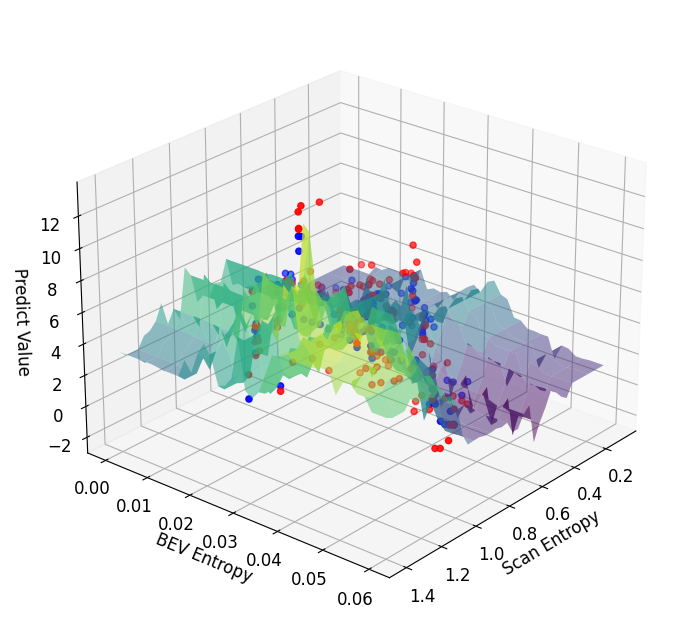

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
def z_standrand_scaler( y_pred, y_test):
    # draw the accuracy curve
    accuracys = []
    num_0_pred = []
    num_1_pred = []
    num_0_test = []
    num_1_test = []
    per = np.arange(0, 9, 0.3)
    for standard in per:
        y_pred2 = y_pred.copy()
        y_test2 = y_test.copy()
        y_pred2[y_pred2 <= standard] = 0
        y_pred2[y_pred2 > standard] = 1
        y_test2[y_test2 <= standard] = 0
        y_test2[y_test2 > standard] = 1
        accuracy = np.sum(y_pred2 == y_test2) / len(y_test2)
        accuracys.append(accuracy)
        num_0_pred.append(np.sum(y_pred2 == 0))
        num_1_pred.append(np.sum(y_pred2 == 1))
        num_0_test.append(np.sum(y_test2 == 0))
        num_1_test.append(np.sum(y_test2 == 1))

    # draw the accuracy curve
    plt.figure(figsize=(8,4.5))
    # plt.subplot(2,1,1)
    plt.plot(per, accuracys)
    # plt.title('accuracy')
    # 坐标轴字体大小
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('binarization standard', fontsize=16)
    plt.ylabel('predict accuracy', fontsize=16)
    plt.grid()
    for i in range(len(per)):
        if i % 3 == 0:
            plt.text(per[i], accuracys[i], str(round(100*accuracys[i], 1))+'%', fontsize=12, color='red', ha='center', va='bottom')
    plt.savefig('s1_accuracy.pdf')
    # plt.subplot(2,1,2)
    # # draw 0 and 1 in one figure
    # plt.plot(per, num_0_pred, label='num_0_pred')
    # plt.plot(per, num_1_pred, label='num_1_pred')
    # plt.plot(per, num_0_test, label='num_0_test')
    # plt.plot(per, num_1_test, label='num_1_test')
    # plt.xlabel('binarization standard')
    # plt.ylabel('sample number')
    # # text the accuracy of each point
    # for i in range(len(per)):
    #     # plt.text(per[i], num_1_pred[i], str(round(accuracys[i], 3)))
    #     plt.text(per[i], num_0_pred[i], str(round(num_0_pred[i], 3)))
    #     plt.text(per[i], num_1_pred[i], str(round(num_1_pred[i], 3)))
    #     plt.text(per[i], num_0_test[i], str(round(num_0_test[i], 3)))
    #     plt.text(per[i], num_1_test[i], str(round(num_1_test[i], 3)))

    # plt.legend()
    # plt.title('num')
    # plt.show()

    return

def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mae, r2


def test_on_local(filp,use,X_train, X_test, y_train, y_test):

    if use:
        index = np.where(y_train> filp)
        X_train = np.concatenate((X_train, X_train[index]), axis=0)
        y_train = np.concatenate((y_train, y_train[index]), axis=0)

        X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)


    gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.2)
    gbr.fit(X_train,y_train)
    y_pred = gbr.predict(X_train)
    gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_train, y_pred)
    print('[GBR x and y] test on train dataset')
    print('mse: ', gbr_mse)
    print('rmse: ', gbr_rmse)
    print('mae: ', gbr_mae)
    print('r2: ', gbr_r2)

    y_pred = gbr.predict(X_test)
    gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred)
    print('[GBR x and y] test on test dataset')
    print('mse: ', gbr_mse)
    print('rmse: ', gbr_rmse)
    print('mae: ', gbr_mae)
    print('r2: ', gbr_r2)

    z_standrand_scaler(y_pred, y_test)

    # vis the test data and curve in 3D

    #生成网格点
    X, Y = np.meshgrid(np.linspace(0.1, 1.4, 40), np.linspace(0, 0.06, 40))
    # X, Y = np.meshgrid(np.linspace(-1.1, 1.1, 30), np.linspace(-4.0, -1.9, 30))
    Z = gbr.predict(np.column_stack((X.ravel(), Y.ravel())))
    Z = Z.reshape(X.shape)
    # Z[Z <= 0] = np.nan
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    # ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', marker='o')
    ax.scatter(X_test[:,0], X_test[:,1], y_test, c='r', marker='o',label='GT')
    ax.scatter(X_test[:,0], X_test[:,1], y_pred, c='b', marker='o',label='Predict')
    ax.set_xlabel('Scan Entropy',fontsize=12)
    ax.set_ylabel('BEV Entropy',fontsize=12)
    ax.set_zlabel('Predict Value',fontsize=12)
    # 设置坐标轴刻度字体大小
    ax.tick_params(labelsize=12)
    # ax.set_title('S1 Scene Entropy Regression',fontsize=12)
    ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.5, rstride=3, cstride=3,label='Regression Surface')
    ax.view_init(elev=25, azim=40)
    plt.savefig('s1_regression.pdf')
    plt.show()

test_on_local(10,False,X_train, X_test, y_train, y_test)